In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rvm import RVM
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def data(N):
    n1 = N
    n2 = N
    x1, y1 = np.random.multivariate_normal([0, 0], [[0.5, 0], [0, 0.5]], n1).T
    x2, y2 = np.random.multivariate_normal([-2, 0], [[1, 0], [0, 0.5]], n1).T
    x1 = np.hstack((x1, x2))
    y1 = np.hstack((y1, y2))
    x3, y3 = np.random.multivariate_normal([-3, 4], [[0.2, 0], [0, 5]], n2).T

    class1 = np.concatenate([x1.reshape(-1, 1), y1.reshape(-1, 1)], axis=1)
    class2 = np.concatenate([x3.reshape(-1, 1), y3.reshape(-1, 1)], axis=1)
    y = np.ones(2 * n1 + n2)
    y[:2 * n1] *= -1
    X = np.concatenate((class1, class2))
    return X, y

In [3]:
import time 

N = [10, 20, 30, 70, 100, 200, 300, 400, 500, 600, 700, 800]
upper_bound_mc = []
upper_bound_mc_std = []
upper_bound = []
lower_bound = []
evidence = []
evidence_std = []
components = []

In [4]:
for i in N:
    X, y = data(i)
    est = RVM(kernel='poly', degree=2, n_iter=4000, threshold_alpha=1e14)
    start_time = time.time()
    est.fit(X, y)
    print 'Fitting %d points dataset took %.3f seconds' % (i, time.time() - start_time)
    upper_bound.append(est.upper_bound[-1])
    lower_bound.append(est.lower_bound[-1])
    
    start_time = time.time()
    e, e_std = est.evidence(n_points=5000, n_epoch=100) 
    evidence.append(e)
    evidence_std.append(e_std)
    print '\tMC estimation of evidence: %.3f seconds' % (time.time() - start_time)
    print '\t\t%.5f+-%.5f' % (e, e_std)
    
    start_time = time.time()
    ub, ub_std = est.upper_bound_mc(n_points=5000, n_epoch=100) 
    upper_bound_mc.append(ub)
    upper_bound_mc_std.append(ub_std)
    print '\tMC estimation of mc upper bound: %.3f seconds' % (time.time() - start_time)
    print '\t\t%.5f+-%.5f' % (ub, ub_std)
    
    components.append(len(est.relevance_))

Fitting 10 points dataset took 1.584 seconds
	MC estimation of evidence: 18.716 seconds
		-6.07582+-0.33221
	MC estimation of mc upper bound: 18.019 seconds
		-1.26801+-0.92197


rvm.py:101: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(-X.dot(w))).sum() + 0.5 * (self.alpha_ * w * w).sum()


Fitting 20 points dataset took 3.376 seconds
	MC estimation of evidence: 17.293 seconds
		-4.26985+-0.53392
	MC estimation of mc upper bound: 16.147 seconds
		0.66771+-0.79173
Fitting 30 points dataset took 4.187 seconds
	MC estimation of evidence: 18.187 seconds
		-14.99374+-0.43637
	MC estimation of mc upper bound: 22.985 seconds
		-8.54529+-0.99208
Fitting 70 points dataset took 9.475 seconds
	MC estimation of evidence: 23.390 seconds
		-37.58459+-0.26586
	MC estimation of mc upper bound: 23.208 seconds
		-32.95865+-0.68428
Fitting 100 points dataset took 13.608 seconds
	MC estimation of evidence: 26.857 seconds
		-36.36793+-0.67765
	MC estimation of mc upper bound: 26.284 seconds
		-29.68233+-0.87387
Fitting 200 points dataset took 33.777 seconds
	MC estimation of evidence: 37.130 seconds
		-72.24550+-0.31563
	MC estimation of mc upper bound: 38.055 seconds
		-65.67522+-0.84109
Fitting 300 points dataset took 69.651 seconds
	MC estimation of evidence: 47.249 seconds
		-118.73986+-0

In [5]:
N = np.array(N)
upper_bound_mc = np.array(upper_bound_mc)
upper_bound = np.array(upper_bound)
lower_bound = np.array(lower_bound)
evidence = np.array(evidence)
evidence_std = np.array(evidence_std)
upper_bound_mc_std = np.array(upper_bound_mc_std)

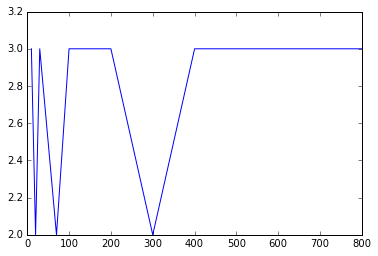

In [6]:
plt.plot(N, components)

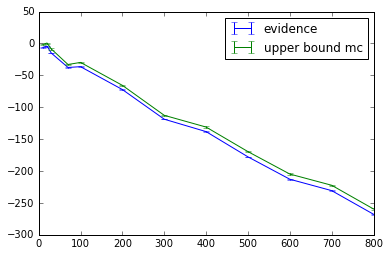

In [7]:
plt.errorbar(N, evidence, yerr=evidence_std, label='evidence')
plt.errorbar(N, upper_bound_mc, yerr=upper_bound_mc_std, label='upper bound mc')
plt.legend(loc='best')

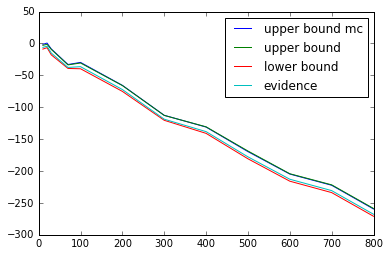

In [8]:
plt.plot(N, upper_bound_mc, label='upper bound mc')
plt.plot(N, upper_bound, label='upper bound')
plt.plot(N, lower_bound, label='lower bound')
plt.plot(N, evidence, label='evidence')
plt.legend(loc='best')

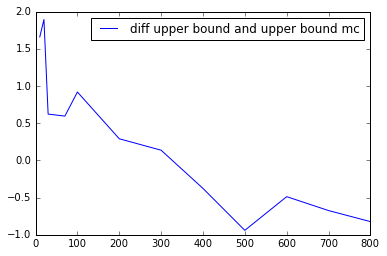

In [9]:
plt.plot(N, np.array(upper_bound_mc) - np.array(upper_bound), label='diff upper bound and upper bound mc')
plt.legend(loc='best')

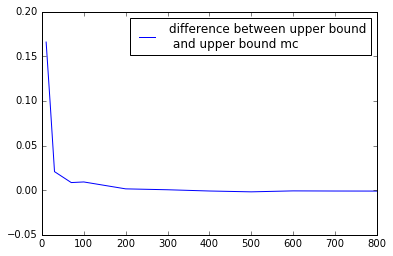

In [10]:
plt.plot(N, (np.array(upper_bound_mc) - np.array(upper_bound)) / N, 
         label='difference between upper bound\n and upper bound mc')
plt.legend(loc='best')

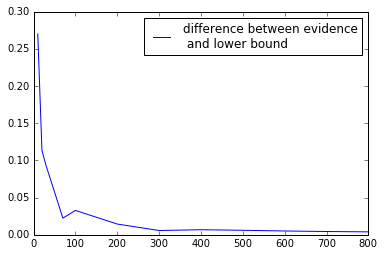

In [11]:
plt.plot(N, (np.array(evidence) - np.array(lower_bound)) / N, 
         label='difference between evidence\n and lower bound')
plt.legend(loc='best')

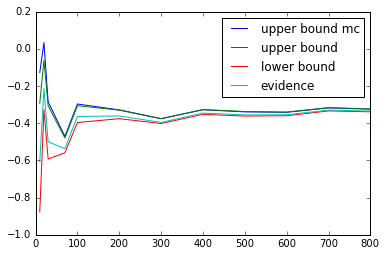

In [12]:
plt.plot(N, upper_bound_mc / N, label='upper bound mc')
plt.plot(N, upper_bound / N, label='upper bound')
plt.plot(N, lower_bound / N, label='lower bound')
plt.plot(N, evidence / N, label='evidence')
plt.legend(loc='best')